Import Libraries

In [86]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Read the Dataset

In [87]:
# Read the dataset
df = pd.read_csv(r'/Users/battih/Desktop/Personal/Sentiment Analysis/Dataset/IMDB Dataset.csv')

In [88]:
df.shape
# 50000 rows and 2 columns

(50000, 2)

In [89]:
# Load the first 5 observations of data
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [90]:
# Check for the target with unique values
df['sentiment'].value_counts()
# It's a balanced dataset

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

In [91]:
# Check for missing values
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [92]:
df['review_length'] = df['review'].apply(len)
# Check the length of the review

In [93]:
df.head()

,review,sentiment,review_length
0,One of the other reviewers has mentioned that ...,positive,1761
1,A wonderful little production. <br /><br />The...,positive,998
2,I thought this was a wonderful way to spend ti...,positive,926
3,Basically there's a family where a little boy ...,negative,748
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1317


In [94]:
df['word_count'] = df['review'].apply(lambda x: len(x.split(" ")))
# Count number of words
df.head()

,review,sentiment,review_length,word_count
0,One of the other reviewers has mentioned that ...,positive,1761,307
1,A wonderful little production. <br /><br />The...,positive,998,162
2,I thought this was a wonderful way to spend ti...,positive,926,166
3,Basically there's a family where a little boy ...,negative,748,138
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1317,230


Exploratory Data Analysis

C:\Users\battih\AppData\Local\Temp\ipykernel_63132\844596844.py:19: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1,1].boxplot([sentiment_groups.get_group('positive'),


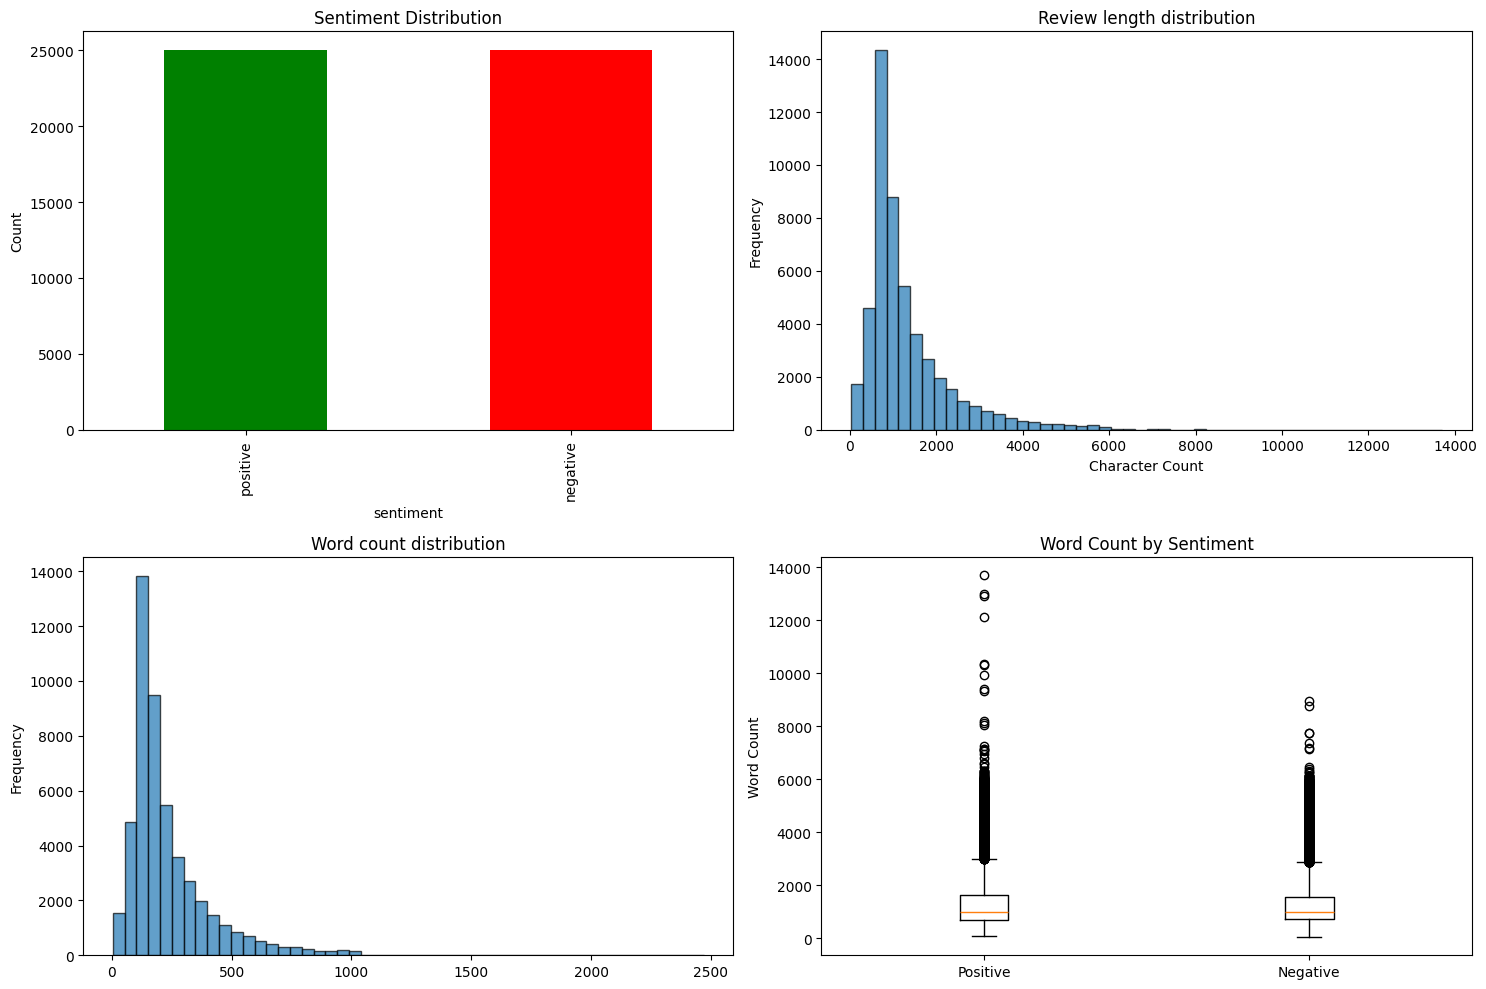

In [96]:
fig, axes = plt.subplots(2,2,figsize=(15,10))

df['sentiment'].value_counts().plot(kind='bar', ax=axes[0,0],color=['green','red'])
axes[0,0].set_title('Sentiment Distribution')
axes[0,0].set_ylabel('Count')

axes[0,1].hist(df['review_length'], bins=50, edgecolor='black', alpha=0.7)
axes[0,1].set_title('Review length distribution')
axes[0,1].set_xlabel('Character Count')
axes[0,1].set_ylabel('Frequency')


axes[1,0].hist(df['word_count'], bins=50, edgecolor='black', alpha=0.7)
axes[1,0].set_title('Word count distribution')
axes[1,0].set_ylabel('Word Count')
axes[1,0].set_ylabel('Frequency')

sentiment_groups = df.groupby('sentiment')['review_length']
axes[1,1].boxplot([sentiment_groups.get_group('positive'),
                   sentiment_groups.get_group('negative')],
                   labels = ['Positive', 'Negative'])
axes[1,1].set_title('Word Count by Sentiment')
axes[1,1].set_ylabel('Word Count')

plt.tight_layout()
plt.show()

Text Preprocessing

In [97]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-english')
nltk.download('punkt')

stop_words = set(stopwords.words('english'))
lematizer = WordNetLemmatizer()
movie_stopwords = {'movie', 'film', 'show', 'character', 'characters', 
                   'scene', 'scenes', 'watch', 'watching', 'see', 'saw',
                   'br', 'one', 'would', 'could', 'also', 'even', 'get',
                   'movies', 'films', 'made', 'make', 'making'}

stop_words.update(movie_stopwords)

import regex as re
# Text pre processing
def preprocess_text(text:str, verbose=False, ):
    ''' 
    Clean text for sentiment analysis with real world data 
    '''

    if verbose:
        print(f'\nOriginal: {text}')
    
    text = text.lower()

    text = re.sub(r'<.*?>', "", text) # Remove html tags
    text = re.sub(r'https?://\S+|www\.\S+','', text) # Remove urls
    text = re.sub(r'[^a-zA-Z\s.!?]','', text) # Remove special characters 
    text = re.sub(r'\s+',' ', text) # Remove extra whitespace

    if verbose:
        print(f'After cleaning: {text}')

    tokens = word_tokenize(text,preserve_line=True)

    tokens = [word for word in tokens if word not in stop_words and len(word)>2]

    tokens = [lematizer.lemmatize(word) for word in tokens]

    cleaned_text = ' '.join(tokens)

    if verbose:
        print(f'After preprocessing: {cleaned_text}')

    return cleaned_text

test_review = df['review'].iloc[0]
preprocess_text(test_review,verbose=True)


Original: One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\battih\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\battih\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Error loading omw-english: Package 'omw-english' not found
[nltk_data]     in index
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\battih\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


'reviewer mentioned episode youll hooked. right exactly happened me.the first thing struck brutality unflinching violence set right word go. trust faint hearted timid. pull punch regard drug sex violence. hardcore classic use word.it called nickname given oswald maximum security state penitentary. focus mainly emerald city experimental section prison cell glass front face inwards privacy high agenda. city home many aryan muslim gangsta latino christian italian irish .... scuffle death stare dodgy dealing shady agreement never far away.i say main appeal due fact go show wouldnt dare. forget pretty picture painted mainstream audience forget charm forget romance ... doesnt mess around. first episode ever struck nasty surreal couldnt say ready watched developed taste got accustomed high level graphic violence. violence injustice crooked guard wholl sold nickel inmate wholl kill order away well mannered middle class inmate turned prison bitch due lack street skill prison experience may beco

In [98]:
def progress_bar(iteration, total, prefix='', suffix='', length = 50, fill='█'):
    percent = f"{100*iteration/float(total):.1f}"
    filled_length = int(length*iteration//total)
    bar = fill * filled_length + '-' * (length-filled_length)
    print(f'\r{prefix} | {bar} | {percent}% {suffix}', end='\r')
    if iteration == total:
        print()

In [99]:
print("Cleaning reviews...")
df['cleaned_review'] = ''
total = len(df)

for i in range(total):
    df.loc[i, 'cleaned_review'] = preprocess_text(df.loc[i, 'review'])
    if i % 1000 == 0:
        progress_bar(i, total, prefix='Progress:', suffix='Complete')

progress_bar(total, total, prefix='Progress:', suffix='Complete')

Cleaning reviews...
Progress: | ██████████████████████████████████████████████████ | 100.0% Complete


In [100]:
positive_reviews

0        reviewer mentioned episode youll hooked. right...
1        wonderful little production. filming technique...
2        thought wonderful way spend time hot summer we...
4        petter matteis love time money visually stunni...
5        probably alltime favorite story selflessness s...
                               ...                        
49983    loved fan original series always wondered back...
49985    imaginary hero clearly best year. complete utt...
49989    got week ago love modern light filled true com...
49992    john garfield play marine blinded grenade figh...
49995    thought right good job. wasnt creative origina...
Name: cleaned_review, Length: 25000, dtype: object

In [103]:
top_negative[:15]

[('like', 22169),
 ('good', 13323),
 ('bad', 12773),
 ('time', 12233),
 ('really', 12104),
 ('...', 11677),
 ('dont', 9991),
 ('story', 9600),
 ('much', 9514),
 ('people', 8896),
 ('thing', 8686),
 ('first', 7861),
 ('plot', 7530),
 ('think', 7494),
 ('acting', 7291)]

In [107]:
from collections import Counter

def get_top_words(text_series, n=20):
    '''Get top n words from a series of text'''
    all_words = ' '.join(text_series).split()
    return Counter(all_words).most_common(n)

positive_reviews = df[df['sentiment']=='positive']['cleaned_review']
negative_reviews = df[df['sentiment']=='negative']['cleaned_review']

top_positive = get_top_words(positive_reviews, 20)
top_negative = get_top_words(negative_reviews, 20)
print('Most Common words in sentiment review')
print('='*40)
print('Top 20 words in Positive reviews')
for word,count in top_positive:
    print(f"{word:20} : {count:,}")
print('-'*40)
print('Top 20 words in Negative reviews')
for word, count in top_negative:
    print(f'{word:20} : {count:,}')

Most Common words in sentiment review
Top 20 words in Positive reviews
like                 : 17,425
good                 : 13,431
time                 : 13,018
story                : 12,460
great                : 12,190
really               : 10,617
well                 : 9,896
first                : 8,730
much                 : 8,711
love                 : 8,542
people               : 8,175
best                 : 7,987
...                  : 7,854
life                 : 7,771
way                  : 7,672
many                 : 7,495
think                : 7,387
two                  : 6,782
dont                 : 6,569
year                 : 6,556
----------------------------------------
Top 20 words in Negative reviews
like                 : 22,169
good                 : 13,323
bad                  : 12,773
time                 : 12,233
really               : 12,104
...                  : 11,677
dont                 : 9,991
story                : 9,600
much                 : 9,514
pe

Text(0.5, 1.0, 'Top 20 words in Negative Reviews')

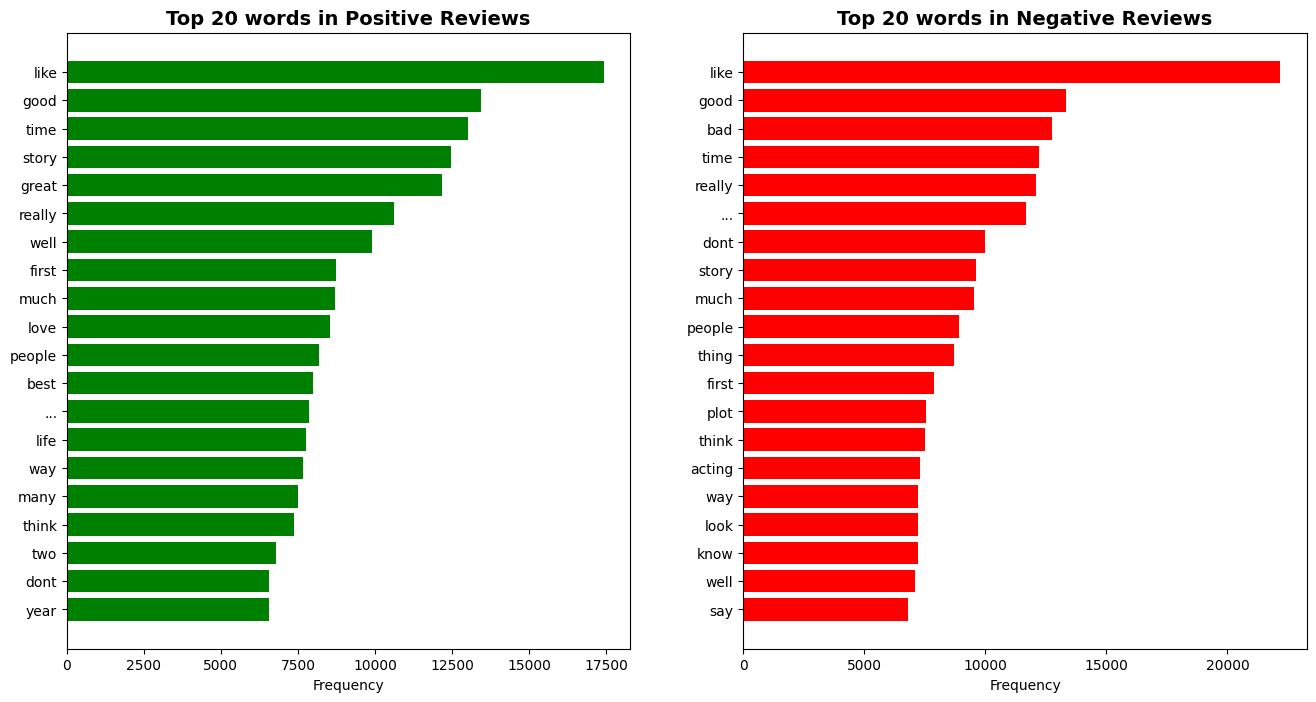

In [113]:
# Visualize word frequencies
fig, axes = plt.subplots(1,2, figsize=(16,8))

# Positive words
positive_words, positive_counts = zip(*top_positive)
y_pos = np.arange(len(positive_words))
axes[0].barh(y_pos,positive_counts,color='green')
axes[0].set_yticks(y_pos)
axes[0].set_yticklabels(positive_words)
axes[0].invert_yaxis()
axes[0].set_xlabel('Frequency')
axes[0].set_title('Top 20 words in Positive Reviews', fontsize=14, fontweight='bold')

negative_words, negative_counts = zip(*top_negative)
axes[1].barh(y_pos, negative_counts, color='r')
axes[1].set_yticks(y_pos)
axes[1].set_yticklabels(negative_words)
axes[1].invert_yaxis()
axes[1].set_xlabel('Frequency')
axes[1].set_title('Top 20 words in Negative Reviews', fontsize=14, fontweight='bold')

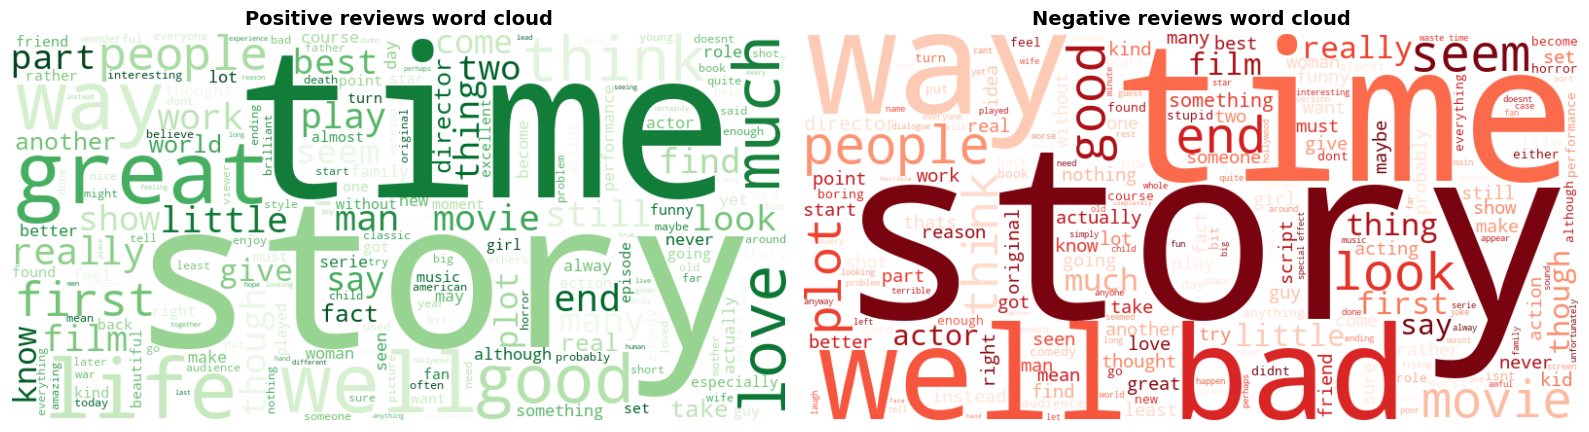

In [124]:
from wordcloud import WordCloud
positive_text = ' '.join(positive_reviews)
negative_text = ' '.join(negative_reviews)

wordcloud_pos = WordCloud(width=800, height=400, background_color='white', max_words=200, colormap='Greens').generate(positive_text)
wordcloud_neg = WordCloud(width=800, height=400, background_color='white', max_words=200, colormap='Reds').generate(negative_text)

fig,axes = plt.subplots(1,2, figsize=(16,6))

axes[0].imshow(wordcloud_pos, interpolation='bilinear')
axes[0].axis('off')
axes[0].set_title('Positive reviews word cloud', fontsize=14, fontweight='bold')

axes[1].imshow(wordcloud_neg, interpolation='bilinear')
axes[1].axis('off')
axes[1].set_title('Negative reviews word cloud', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

Analyst Bigrams & Trigrams

In [130]:
print("N-GRAM ANALYSIS")

from nltk.util import ngrams

def get_top_ngrams(text_series, n=2, top_k=15):
    """Get top n-grams from text series"""
    all_ngrams = []
    for text in text_series:
        tokens = text.split()
        all_ngrams.extend(list(ngrams(tokens, n)))
    
    return Counter(all_ngrams).most_common(top_k)

print("\n TOP BIGRAMS (2-word phrases):")
print("-" * 40)
print("Positive Reviews:")
for bigram, count in get_top_ngrams(positive_reviews, n=2, top_k=10):
    print(f"  {' '.join(bigram):30} : {count}")

print("\nNegative Reviews:")
for bigram, count in get_top_ngrams(negative_reviews, n=2, top_k=10):
    print(f"  {' '.join(bigram):30} : {count}")

print("\n TOP TRIGRAMS (3-word phrases):")
print("-" * 40)
print("Positive Reviews:")
for trigram, count in get_top_ngrams(positive_reviews, n=3, top_k=8):
    print(f"  {' '.join(trigram):40} : {count}")

print("\nNegative Reviews:")
for trigram, count in get_top_ngrams(negative_reviews, n=3, top_k=8):
    print(f"  {' '.join(trigram):40} : {count}")

N-GRAM ANALYSIS

 TOP BIGRAMS (2-word phrases):
----------------------------------------
Positive Reviews:
  ive seen                       : 995
  dont know                      : 865
  first time                     : 809
  new york                       : 759
  year old                       : 746
  look like                      : 727
  special effect                 : 714
  dont think                     : 569
  year ago                       : 553
  ever seen                      : 545

Negative Reviews:
  look like                      : 2141
  special effect                 : 1280
  dont know                      : 1201
  waste time                     : 1093
  ive seen                       : 1048
  worst ever                     : 888
  ever seen                      : 885
  ive ever                       : 843
  year old                       : 827
  much better                    : 824

 TOP TRIGRAMS (3-word phrases):
----------------------------------------
Positive Review

Prepare dataset for modelling

In [131]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['sentiment_encoded'] = le.fit_transform(df['sentiment'])

X = df['cleaned_review']
y = df['sentiment_encoded']


Split data into train/test/val sets

In [139]:
# Split the data into train and temp
X_temp,X_test, y_temp, y_test = train_test_split(X,y,test_size=0.2, random_state=42,stratify=y)

# Split the data into train and val
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.20, random_state=42, stratify=y_temp)

Save the dataset

In [140]:
train_df = pd.DataFrame({
    'text': X_train,
    'sentiment':y_train
})

test_df = pd.DataFrame({
    'text': X_test,
    'sentiment':y_test
})

val_df = pd.DataFrame({
    'text':_X_val,
    'sentiment':y_val
})

train_df.to_csv('imdb_train.csv', index=False)
val_df.to_csv('imdb_val.csv',index=False)
test_df.to_csv('imdb_test.csv',index=False)

In [65]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import joblib
import pickle

In [ ]:
# Convert the data into vectors with tfidf

In [142]:
# Option 1: Basic TF-IDF
vectorizer_basic = TfidfVectorizer(
    max_features=50000,  # Limit vocabulary size
    stop_words='english',
    ngram_range=(1, 2)  # Consider both unigrams and bigrams
)

# Option 2: With more features and different parameters
vectorizer_large = TfidfVectorizer(
    max_features=100000,
    stop_words='english',
    ngram_range=(1, 3),  # Unigrams, bigrams, trigrams
    min_df=5,           # Ignore terms that appear in less than 5 documents
    max_df=0.7          # Ignore terms that appear in more than 70% of documents
)

In [143]:
X_train_tfidf_basic = vectorizer_basic.fit_transform(X_train)
X_train_tfidf_large = vectorizer_large.fit_transform(X_train)

# For Basic vectorizer
X_val_tfidf_basic = vectorizer_basic.transform(X_val)
X_test_tfidf_basic = vectorizer_basic.transform(X_test)

# For Large vectorizer
X_val_tfidf_large = vectorizer_large.transform(X_val)
X_test_tfidf_large = vectorizer_large.transform(X_test)


Model Building

In [145]:
lr_model = LogisticRegression(
    random_state=42
)

lr_model.fit(X_train_tfidf_basic,y_train)
y_train_pred = lr_model.predict(X_train_tfidf_basic)
y_val_pred = lr_model.predict(X_val_tfidf_basic)

train_accuracy = accuracy_score(y_train,y_train_pred)
val_accuracy = accuracy_score(y_val,y_val_pred)

train_f1 = f1_score(y_train, y_train_pred)
val_f1 = f1_score(y_val, y_val_pred)


print(f"\n Logistic Regression Performance:")
print(f"   Training Accuracy: {train_accuracy:.4f}")
print(f"   Validation Accuracy: {val_accuracy:.4f}")
print(f"   Training F1-Score: {train_f1:.4f}")
print(f"   Validation F1-Score: {val_f1:.4f}")


 Logistic Regression Performance:
   Training Accuracy: 0.9360
   Validation Accuracy: 0.8905
   Training F1-Score: 0.9366
   Validation F1-Score: 0.8926



 Classification report for training
              precision    recall  f1-score   support

           0       0.94      0.93      0.94     16000
           1       0.93      0.94      0.94     16000

    accuracy                           0.94     32000
   macro avg       0.94      0.94      0.94     32000
weighted avg       0.94      0.94      0.94     32000


 Classification report for validation data
              precision    recall  f1-score   support

           0       0.91      0.87      0.89      4000
           1       0.88      0.91      0.89      4000

    accuracy                           0.89      8000
   macro avg       0.89      0.89      0.89      8000
weighted avg       0.89      0.89      0.89      8000



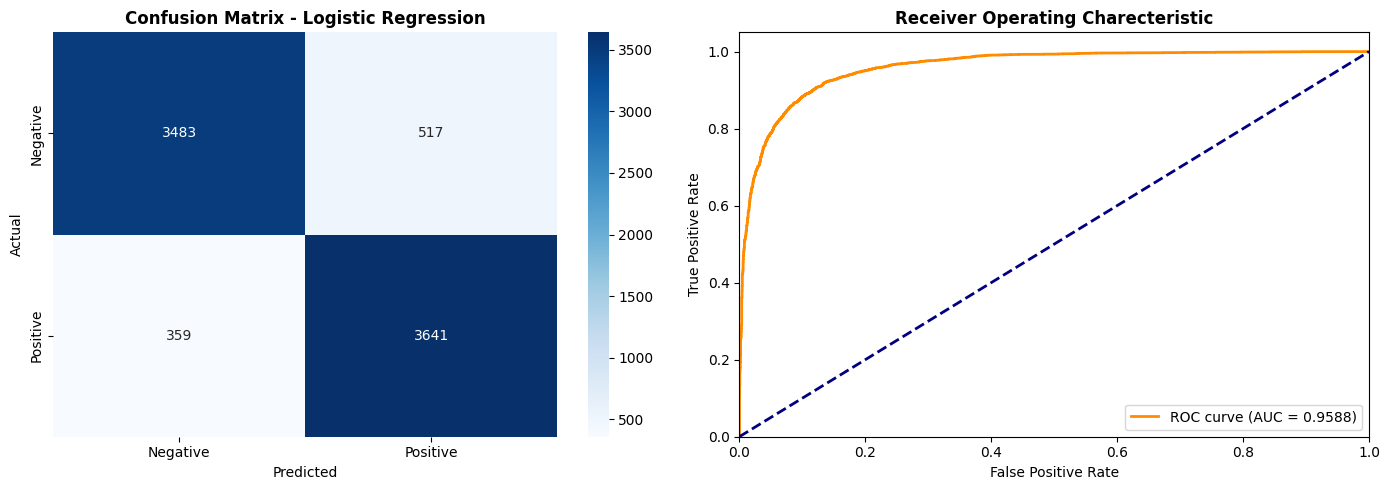

In [151]:
print(f'\n Classification report for training')
print(classification_report(y_train, y_train_pred))

print(f'\n Classification report for validation data')
print(classification_report(y_val, y_val_pred))


y_val_proba = lr_model.predict_proba(X_val_tfidf_basic)[:,1]

cm = confusion_matrix(y_val,y_val_pred)

fig,axes = plt.subplots(1,2, figsize=(14,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative','Positive'], ax=axes[0])
axes[0].set_title('Confusion Matrix - Logistic Regression', fontweight='bold')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# ROC-AUC Curve
fpr, tpr, thresholds = roc_curve(y_val, y_val_proba)
roc_auc = roc_auc_score(y_val,y_val_proba)
axes[1].plot(fpr, tpr, color='darkorange', lw=2,
             label=f'ROC curve (AUC = {roc_auc:.4f})')
axes[1].plot([0,1],[0,1],color='navy',lw=2, linestyle='--')
axes[1].set_xlim([0.0,1.0])
axes[1].set_ylim([0.0,1.05])
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title('Receiver Operating Charecteristic', fontweight='bold')
axes[1].legend(loc='best')

plt.tight_layout()
plt.show()

In [155]:
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=251),
    'Linear SVM': LinearSVC(random_state=42),
    'Naive Bayes': MultinomialNB()
}

result = {}

for name, model in models.items():
    print(f'Training {name}')
    model.fit(X_train_tfidf_basic, y_train)
    y_val_pred = model.predict(X_val_tfidf_basic)
    accuracy = accuracy_score(y_val,y_val_pred)
    precision = precision_score(y_val,y_val_pred)
    recall = recall_score(y_val,y_val_pred)
    f1 = f1_score(y_val,y_val_pred)

    result[name] = {
        'model':model,
        'accuracy':accuracy,
        'precision':precision,
        'recall':recall,
        'f1_score':f1
    }

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

    print('='*50)
    print()

Training Logistic Regression
Accuracy: 0.8905
Precision: 0.8757
Recall: 0.9103
F1 Score: 0.8926

Training Random Forest
Accuracy: 0.8586
Precision: 0.8522
Recall: 0.8678
F1 Score: 0.8599

Training Linear SVM
Accuracy: 0.8925
Precision: 0.8814
Recall: 0.9070
F1 Score: 0.8940

Training Naive Bayes
Accuracy: 0.8702
Precision: 0.8635
Recall: 0.8795
F1 Score: 0.8714



Training on Large TFIDF vectors

In [156]:
lr_model = LogisticRegression(
    random_state=42
)

lr_model.fit(X_train_tfidf_large,y_train)
y_train_pred = lr_model.predict(X_train_tfidf_large)
y_val_pred = lr_model.predict(X_val_tfidf_large)

train_accuracy = accuracy_score(y_train,y_train_pred)
val_accuracy = accuracy_score(y_val,y_val_pred)

train_f1 = f1_score(y_train, y_train_pred)
val_f1 = f1_score(y_val, y_val_pred)


print(f"\n Logistic Regression Performance:")
print(f"   Training Accuracy: {train_accuracy:.4f}")
print(f"   Validation Accuracy: {val_accuracy:.4f}")
print(f"   Training F1-Score: {train_f1:.4f}")
print(f"   Validation F1-Score: {val_f1:.4f}")


 Logistic Regression Performance:
   Training Accuracy: 0.9398
   Validation Accuracy: 0.8911
   Training F1-Score: 0.9403
   Validation F1-Score: 0.8932



 Classification report for training
              precision    recall  f1-score   support

           0       0.95      0.93      0.94     16000
           1       0.93      0.95      0.94     16000

    accuracy                           0.94     32000
   macro avg       0.94      0.94      0.94     32000
weighted avg       0.94      0.94      0.94     32000


 Classification report for validation data
              precision    recall  f1-score   support

           0       0.91      0.87      0.89      4000
           1       0.88      0.91      0.89      4000

    accuracy                           0.89      8000
   macro avg       0.89      0.89      0.89      8000
weighted avg       0.89      0.89      0.89      8000



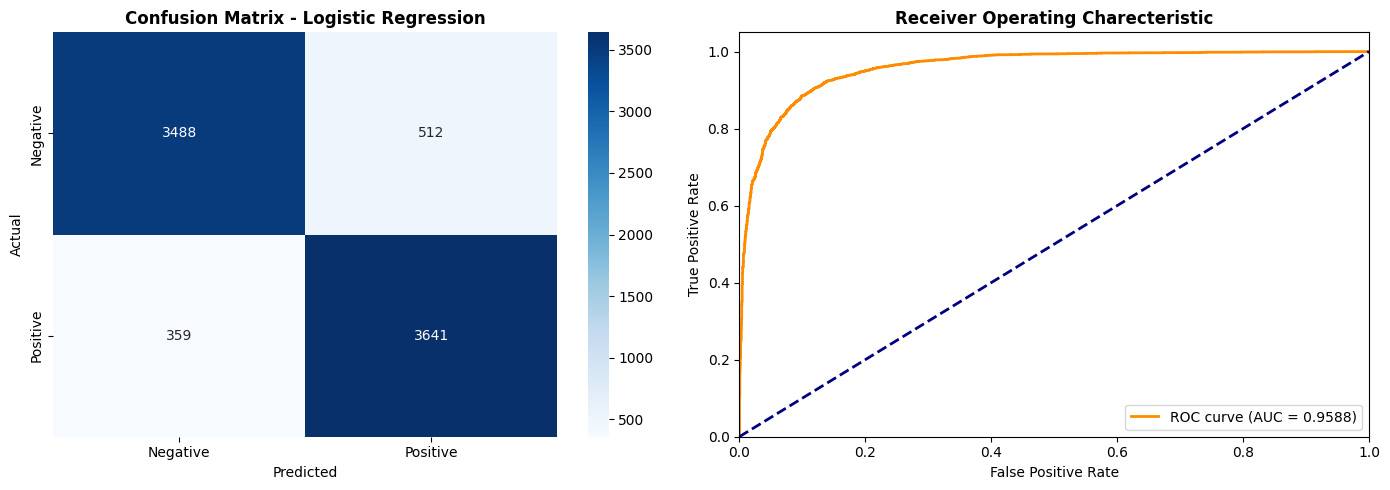

In [158]:
print(f'\n Classification report for training')
print(classification_report(y_train, y_train_pred))

print(f'\n Classification report for validation data')
print(classification_report(y_val, y_val_pred))


y_val_proba = lr_model.predict_proba(X_val_tfidf_large)[:,1]

cm = confusion_matrix(y_val,y_val_pred)

fig,axes = plt.subplots(1,2, figsize=(14,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative','Positive'], ax=axes[0])
axes[0].set_title('Confusion Matrix - Logistic Regression', fontweight='bold')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# ROC-AUC Curve
fpr, tpr, thresholds = roc_curve(y_val, y_val_proba)
roc_auc = roc_auc_score(y_val,y_val_proba)
axes[1].plot(fpr, tpr, color='darkorange', lw=2,
             label=f'ROC curve (AUC = {roc_auc:.4f})')
axes[1].plot([0,1],[0,1],color='navy',lw=2, linestyle='--')
axes[1].set_xlim([0.0,1.0])
axes[1].set_ylim([0.0,1.05])
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title('Receiver Operating Charecteristic', fontweight='bold')
axes[1].legend(loc='best')

plt.tight_layout()
plt.show()

In [159]:
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=251),
    'Linear SVM': LinearSVC(random_state=42),
    'Naive Bayes': MultinomialNB()
}

result = {}

for name, model in models.items():
    print(f'Training {name}')
    model.fit(X_train_tfidf_large, y_train)
    y_val_pred = model.predict(X_val_tfidf_large)
    accuracy = accuracy_score(y_val,y_val_pred)
    precision = precision_score(y_val,y_val_pred)
    recall = recall_score(y_val,y_val_pred)
    f1 = f1_score(y_val,y_val_pred)

    result[name] = {
        'model':model,
        'accuracy':accuracy,
        'precision':precision,
        'recall':recall,
        'f1_score':f1
    }

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

    print('='*50)
    print()

Training Logistic Regression
Accuracy: 0.8911
Precision: 0.8767
Recall: 0.9103
F1 Score: 0.8932

Training Random Forest
Accuracy: 0.8635
Precision: 0.8567
Recall: 0.8730
F1 Score: 0.8648

Training Linear SVM
Accuracy: 0.8940
Precision: 0.8820
Recall: 0.9097
F1 Score: 0.8956

Training Naive Bayes
Accuracy: 0.8735
Precision: 0.8646
Recall: 0.8858
F1 Score: 0.8750



In [161]:
print("HYPERPARAMETER TUNING FOR LINEAR SVM")
print("="*60)

from sklearn.model_selection import GridSearchCV
import time

# Define parameter grid for SVM
param_grid_svm = {
    'C': [0.1, 0.5, 1, 5, 10],
    'loss': ['hinge', 'squared_hinge'],
    'class_weight': [None, 'balanced'],
    'max_iter': [1000, 2000]
}

print("Performing Grid Search for Linear SVM...")
start_time = time.time()

# Create grid search
svm_grid = GridSearchCV(
    LinearSVC(random_state=42),
    param_grid_svm,
    cv=3,  # 3-fold cross-validation
    scoring='f1',
    n_jobs=-1,  # Use all CPU cores
    verbose=1
)

# Fit grid search
svm_grid.fit(X_train_tfidf_large, y_train)

end_time = time.time()
print(f"✅ Grid search completed in {(end_time - start_time)/60:.1f} minutes")

# Best parameters and score
print(f"\n🏆 BEST PARAMETERS:")
for param, value in svm_grid.best_params_.items():
    print(f"   {param}: {value}")
print(f"   Best CV F1-Score: {svm_grid.best_score_:.4f}")

# Train best model
best_svm = svm_grid.best_estimator_
y_val_pred_best = best_svm.predict(X_val_tfidf_large)
best_accuracy = accuracy_score(y_val, y_val_pred_best)
best_f1 = f1_score(y_val, y_val_pred_best)

print(f"\n BEST SVM PERFORMANCE (Validation):")
print(f"   Accuracy: {best_accuracy:.4f}")
print(f"   F1-Score: {best_f1:.4f}")

# Compare with original
print(f"\n IMPROVEMENT:")
print(f"   Original SVM Accuracy: 0.8940")
print(f"   Tuned SVM Accuracy:    {best_accuracy:.4f}")
print(f"   Improvement:           {best_accuracy - 0.8940:+.4f}")

# Save best model
joblib.dump(best_svm, 'svm_tuned_model.pkl')
print("Tuned SVM saved to 'svm_tuned_model.pkl'")

HYPERPARAMETER TUNING FOR LINEAR SVM
Performing Grid Search for Linear SVM...
Fitting 3 folds for each of 40 candidates, totalling 120 fits
✅ Grid search completed in 0.4 minutes

🏆 BEST PARAMETERS:
   C: 0.5
   class_weight: None
   loss: squared_hinge
   max_iter: 1000
   Best CV F1-Score: 0.8931

 BEST SVM PERFORMANCE (Validation):
   Accuracy: 0.8960
   F1-Score: 0.8976

 IMPROVEMENT:
   Original SVM Accuracy: 0.8940
   Tuned SVM Accuracy:    0.8960
   Improvement:           +0.0020
Tuned SVM saved to 'svm_tuned_model.pkl'


In [162]:
print("\n CREATING VOTING ENSEMBLE")
print("="*60)

from sklearn.ensemble import VotingClassifier

# Load or recreate our best models
print("Loading/creating individual models...")

# 1. Tuned SVM (from previous step or create new)
svm_model = best_svm

# 2. Logistic Regression with tuning
print("Tuning Logistic Regression...")
param_grid_lr = {
    'C': [0.1, 1, 10, 100],
    'solver': ['lbfgs', 'liblinear'],
    'class_weight': [None, 'balanced']
}

lr_grid = GridSearchCV(
    LogisticRegression(random_state=42, max_iter=1000),
    param_grid_lr,
    cv=3,
    scoring='f1',
    n_jobs=-1,
    verbose=0
)
lr_grid.fit(X_train_tfidf_large, y_train)
lr_model = lr_grid.best_estimator_

# 3. Random Forest with tuning (quick)
print("Tuning Random Forest...")
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=30,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42,
    n_jobs=-1,
    class_weight='balanced'
)
rf_model.fit(X_train_tfidf_large, y_train)

# Create voting ensemble
print("\nCreating Voting Classifier...")
voting_clf = VotingClassifier(
    estimators=[
        ('svm', svm_model),
        ('lr', lr_model),
        ('rf', rf_model)
    ],
    voting='hard',  # 'soft' if models have predict_proba
    n_jobs=-1
)

# Train ensemble
voting_clf.fit(X_train_tfidf_large, y_train)

# Evaluate ensemble
y_val_pred_ensemble = voting_clf.predict(X_val_tfidf_large)
ensemble_accuracy = accuracy_score(y_val, y_val_pred_ensemble)
ensemble_f1 = f1_score(y_val, y_val_pred_ensemble)

print(f"\n📊 VOTING ENSEMBLE PERFORMANCE:")
print(f"   Accuracy: {ensemble_accuracy:.4f}")
print(f"   F1-Score: {ensemble_f1:.4f}")

# Individual model performances for comparison
models = {
    'SVM': svm_model,
    'Logistic Regression': lr_model,
    'Random Forest': rf_model,
    'Voting Ensemble': voting_clf
}

print(f"\n📈 INDIVIDUAL MODEL COMPARISON:")
for name, model in models.items():
    if name != 'Voting Ensemble':
        y_pred = model.predict(X_val_tfidf_large)
        acc = accuracy_score(y_val, y_pred)
        print(f"   {name:25} Accuracy: {acc:.4f}")

# Save ensemble
joblib.dump(voting_clf, 'voting_ensemble_model.pkl')
print("\n💾 Voting ensemble saved to 'voting_ensemble_model.pkl'")


 CREATING VOTING ENSEMBLE
Loading/creating individual models...
Tuning Logistic Regression...
Tuning Random Forest...

Creating Voting Classifier...

📊 VOTING ENSEMBLE PERFORMANCE:
   Accuracy: 0.8958
   F1-Score: 0.8974

📈 INDIVIDUAL MODEL COMPARISON:
   SVM                       Accuracy: 0.8960
   Logistic Regression       Accuracy: 0.8959
   Random Forest             Accuracy: 0.8486

💾 Voting ensemble saved to 'voting_ensemble_model.pkl'


In [165]:
print("🤖 STEP 1: SETTING UP FOR BERT")
print("="*60)

# Check if we have GPU
import torch
print(f"PyTorch version: {torch.__version__}")
print(f"CUDA available: {torch.cuda.is_available()}")
if torch.cuda.is_available():
    print(f"GPU: {torch.cuda.get_device_name(0)}")
    print(f"CUDA version: {torch.version.cuda}")
else:
    print("⚠️ No GPU detected. BERT training will be slow on CPU.")

# Install transformers if not already installed
import sys
import subprocess
import importlib

# Check and install required packages
required_packages = [
    'transformers',
    'torch',
    'tensorflow',  # for tokenizer
    'datasets',
    'accelerate',
    'evaluate'
]

print("\n📦 Checking/installing required packages...")
for package in required_packages:
    try:
        importlib.import_module(package)
        print(f"   ✓ {package}")
    except ImportError:
        print(f"   📥 Installing {package}...")
        subprocess.check_call([sys.executable, "-m", "pip", "install", package])

🤖 STEP 1: SETTING UP FOR BERT
PyTorch version: 2.9.1+cpu
CUDA available: False
⚠️ No GPU detected. BERT training will be slow on CPU.

📦 Checking/installing required packages...
   📥 Installing transformers...
   ✓ torch
   📥 Installing tensorflow...
   📥 Installing datasets...
   📥 Installing accelerate...
   📥 Installing evaluate...


In [170]:
print("\n🤖 STEP 2: LOADING BERT MODEL & TOKENIZER")
print("="*60)

from transformers import AutoTokenizer, AutoModelForSequenceClassification
from transformers import TrainingArguments, Trainer
import torch.nn as nn

# Choose BERT model (smaller for faster training, can upgrade later)
MODEL_NAME = "distilbert-base-uncased"  # Smaller, faster version of BERT
# MODEL_NAME = "bert-base-uncased"  # Original BERT (larger, slower)

print(f"Loading tokenizer for: {MODEL_NAME}")
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)

print(f"Loading model for: {MODEL_NAME}")
model = AutoModelForSequenceClassification.from_pretrained(
    MODEL_NAME,
    num_labels=2,  # Binary classification
    output_attentions=False,
    output_hidden_states=False
)

# Move to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
print(f"✅ Model loaded and moved to: {device}")
print(f"   Model parameters: {sum(p.numel() for p in model.parameters()):,}")


🤖 STEP 2: LOADING BERT MODEL & TOKENIZER

Loading tokenizer for: distilbert-base-uncased


C:\Users\battih\AppData\Roaming\Python\Python313\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\battih\.cache\huggingface\hub\models--distilbert-base-uncased. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


Loading model for: distilbert-base-uncased


Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


✅ Model loaded and moved to: cpu
   Model parameters: 66,955,010


In [171]:
print("\n🤖 STEP 3: PREPARING DATASET FOR BERT")
print("="*60)

# We'll work with a subset for faster experimentation (can increase later)
SAMPLE_SIZE = 10000  # Start with 10k, increase to 50k for better results

print(f"Using {SAMPLE_SIZE:,} samples for training (for speed)")
print("You can increase this later for better performance")

# Create a balanced sample
from sklearn.utils import resample

df_sample = pd.concat([
    df[df['sentiment'] == 'positive'].sample(SAMPLE_SIZE//2, random_state=42),
    df[df['sentiment'] == 'negative'].sample(SAMPLE_SIZE//2, random_state=42)
])

print(f"\n📊 Sampled dataset shape: {df_sample.shape}")
print(f"Sentiment distribution:")
print(df_sample['sentiment'].value_counts())

# Convert to binary labels
df_sample['label'] = df_sample['sentiment'].apply(lambda x: 1 if x == 'positive' else 0)

# Split the data
from sklearn.model_selection import train_test_split

train_texts, temp_texts, train_labels, temp_labels = train_test_split(
    df_sample['cleaned_review'].tolist(),
    df_sample['label'].tolist(),
    test_size=0.3,
    random_state=42,
    stratify=df_sample['label']
)

val_texts, test_texts, val_labels, test_labels = train_test_split(
    temp_texts, temp_labels, test_size=0.5, random_state=42, stratify=temp_labels
)

print(f"\n📈 Dataset split:")
print(f"   Training:   {len(train_texts):,} samples")
print(f"   Validation: {len(val_texts):,} samples")
print(f"   Test:       {len(test_texts):,} samples")


🤖 STEP 3: PREPARING DATASET FOR BERT
Using 10,000 samples for training (for speed)
You can increase this later for better performance

📊 Sampled dataset shape: (10000, 6)
Sentiment distribution:
sentiment
positive    5000
negative    5000
Name: count, dtype: int64

📈 Dataset split:
   Training:   7,000 samples
   Validation: 1,500 samples
   Test:       1,500 samples


In [172]:
print("\n🤖 STEP 4: TOKENIZING DATA")
print("="*60)

print("Tokenizing training data...")
train_encodings = tokenizer(
    train_texts,
    truncation=True,
    padding=True,
    max_length=128,  # BERT max length is 512, but 128 is enough for reviews
    return_tensors="pt"
)

print("Tokenizing validation data...")
val_encodings = tokenizer(
    val_texts,
    truncation=True,
    padding=True,
    max_length=128,
    return_tensors="pt"
)

print("Tokenizing test data...")
test_encodings = tokenizer(
    test_texts,
    truncation=True,
    padding=True,
    max_length=128,
    return_tensors="pt"
)

print(f"\n✅ Tokenization complete!")
print(f"   Training shape: {train_encodings['input_ids'].shape}")
print(f"   Sample tokenized output:")
print(f"   Original text: {train_texts[0][:100]}...")
print(f"   Token IDs: {train_encodings['input_ids'][0][:20]}...")
print(f"   Attention mask: {train_encodings['attention_mask'][0][:20]}...")


🤖 STEP 4: TOKENIZING DATA
Tokenizing training data...
Tokenizing validation data...
Tokenizing test data...

✅ Tokenization complete!
   Training shape: torch.Size([7000, 128])
   Sample tokenized output:
   Original text: brought tear eye john robert really knew viewer heart directing wonderful picture life viewed mind h...
   Token IDs: tensor([  101,  2716,  7697,  3239,  2198,  2728,  2428,  2354, 13972,  2540,
         9855,  6919,  3861,  2166,  7021,  2568,  2540,  2703,  2666,  1012])...
   Attention mask: tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])...


In [173]:
print("\n🤖 STEP 5: CREATING PYTORCH DATASET")
print("="*60)

import torch
from torch.utils.data import Dataset

class IMDBDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels
    
    def __getitem__(self, idx):
        item = {key: val[idx] for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item
    
    def __len__(self):
        return len(self.labels)

# Create datasets
train_dataset = IMDBDataset(train_encodings, train_labels)
val_dataset = IMDBDataset(val_encodings, val_labels)
test_dataset = IMDBDataset(test_encodings, test_labels)

print(f"✅ Datasets created!")
print(f"   Training dataset size: {len(train_dataset)}")
print(f"   Validation dataset size: {len(val_dataset)}")
print(f"   Test dataset size: {len(test_dataset)}")

# Test a sample
sample = train_dataset[0]
print(f"\n📝 Sample from dataset:")
for key, value in sample.items():
    if isinstance(value, torch.Tensor):
        print(f"   {key}: shape={value.shape}, dtype={value.dtype}")
    else:
        print(f"   {key}: {type(value)}")


🤖 STEP 5: CREATING PYTORCH DATASET
✅ Datasets created!
   Training dataset size: 7000
   Validation dataset size: 1500
   Test dataset size: 1500

📝 Sample from dataset:
   input_ids: shape=torch.Size([128]), dtype=torch.int64
   attention_mask: shape=torch.Size([128]), dtype=torch.int64
   labels: shape=torch.Size([]), dtype=torch.int64


In [177]:
print("\n🤖 STEP 6: SETTING UP TRAINING")
print("="*60)

from transformers import TrainingArguments

# Training arguments
training_args = TrainingArguments(
    output_dir='./bert-sentiment-results',  # output directory
    num_train_epochs=3,                     # number of training epochs
    per_device_train_batch_size=16,         # batch size per device during training
    per_device_eval_batch_size=64,          # batch size for evaluation
    warmup_steps=500,                       # number of warmup steps for learning rate scheduler
    weight_decay=0.01,                      # strength of weight decay
    logging_dir='./logs',                   # directory for storing logs
    logging_steps=100,                      # log every X steps
    eval_strategy="epoch",            # evaluate each epoch
    save_strategy="epoch",                  # save checkpoint each epoch
    load_best_model_at_end=True,            # load the best model when finished
    metric_for_best_model="accuracy",       # use accuracy to determine best model
    greater_is_better=True,                 # higher accuracy is better
    report_to="none",                       # disable wandb/tensorboard reporting
    fp16=torch.cuda.is_available(),         # use mixed precision if GPU available
    gradient_accumulation_steps=2,          # accumulate gradients (simulates larger batch)
)

print("📋 Training Configuration:")
print(f"   Epochs: {training_args.num_train_epochs}")
print(f"   Batch size: {training_args.per_device_train_batch_size}")
print(f"   Warmup steps: {training_args.warmup_steps}")
print(f"   Weight decay: {training_args.weight_decay}")
print(f"   FP16: {training_args.fp16}")


🤖 STEP 6: SETTING UP TRAINING
📋 Training Configuration:
   Epochs: 3
   Batch size: 16
   Warmup steps: 500
   Weight decay: 0.01
   FP16: False


In [178]:
print("\n🤖 STEP 7: SETTING UP METRICS & TRAINER")
print("="*60)

import numpy as np
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from transformers import Trainer

# Define compute_metrics function
def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='binary')
    acc = accuracy_score(labels, preds)
    
    return {
        'accuracy': acc,
        'f1': f1,
        'precision': precision,
        'recall': recall
    }

# Create Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics,
)

print("✅ Trainer configured!")
print(f"   Training samples: {len(train_dataset)}")
print(f"   Validation samples: {len(val_dataset)}")
print(f"   Estimated training time: ~{3 * len(train_dataset) / (16 * 3600):.1f} hours on GPU")
print(f"   (Adjust epochs/batch size if needed)")


🤖 STEP 7: SETTING UP METRICS & TRAINER
✅ Trainer configured!
   Training samples: 7000
   Validation samples: 1500
   Estimated training time: ~0.4 hours on GPU
   (Adjust epochs/batch size if needed)


In [179]:
print("\n🤖 STEP 8: TRAINING BERT MODEL")
print("="*60)
print("🚀 Starting training... (This may take 30-60 minutes)")

import time
start_time = time.time()

# Train the model
trainer.train()

end_time = time.time()
training_time = (end_time - start_time) / 60
print(f"✅ Training completed in {training_time:.1f} minutes!")

# Save the trained model
trainer.save_model("./bert-sentiment-model")
tokenizer.save_pretrained("./bert-sentiment-model")
print("💾 Model saved to './bert-sentiment-model/'")

# Evaluate on validation set
print("\n📊 Evaluating on validation set...")
val_results = trainer.evaluate()
print(f"Validation results:")
for key, value in val_results.items():
    print(f"   {key}: {value:.4f}")


🤖 STEP 8: TRAINING BERT MODEL
🚀 Starting training... (This may take 30-60 minutes)


C:\Users\battih\AppData\Roaming\Python\Python313\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Epoch,Training Loss,Validation Loss


KeyboardInterrupt: 